<a href="https://colab.research.google.com/github/Tusharsankhla18/Campus-Recruitment-Training-DSA---JECRC-University/blob/main/Dynamic_Pricing_(EDA_for_Feature_Selection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Selection: Case Study

Feature Selection is a process where we automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

AIM of the Project:

The aim is to conduct an Exploratory Data Analysis (EDA) to identify and select the most important feature that influence the historical cost of ride.

Dataset Information:

1. Number_of_Riders: This is an integer column that represents the number of
   riders.
2. Number_of_Drivers: This is an inteer column that represents the number of
   drivers.
3. Location_Category: This is an object column that represents the category of
   the location (Urban, Suburban, Rural).
4. Customer_loyalty_Status: This is an object column that represents the
   loyalty status of the customer(Silver, Regular)
5. Number_of_Past_Rides: This is an integer column that represents the number  
   of past rides.
6. Average_Ratings: This is a float column that represents the average ratings.
   Time_of_Booking: This is an object column that represent the time of booking (Night, Evening, Afternoon).
7.  Vehicle_Type: This is an object that represents the type of vehicle
   (Premium, Economy).
8.  Expected_Ride_Duration: This is an integer column that represents the        expected ride duration.
9.  Historical_Cost_of_Ride: This is float column that represents the
    historical cost of ride.

Process we can follow while performing Exploratory Data Analysis for Feature Selection:

1. Begin by getting familiar with the dataset.

2. It includes understanding the size, scope, and nature of the data(Structured/ Unstructured), Identifying each feature and its type (Numerical, Categorical), and recognizing the target variable.

3. Identify and handle missing values by imputation, deletion or estimation,
   depending upon the nature of proportion of missing data.

4. Analyze the distribution of each feature using histogram, density plotsor
   bar charts fpr categorical variables.

5. Conduct correlation analysis using pearson, spearman, or kendall correlation
   coefficients to assess the relationship between numeric features and the target variable.

6. Utilize scatter plot, pair plots and heat maps to explore relationships
   between features.
   
7. Based on insights gained through EDA, manually remove redundant features,
   features with very little variance or features highly correlated with others.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


IMPORTING DATA SET INTO GOOGLE COLABORATORY

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dynamic_pricing.csv to dynamic_pricing.csv


In [ ]:
import pandas as pd
import csv

with open('dynamic_pricing.csv') as csv_file:
  csv_reader = csv.reader(csv_file)
  data = list(csv_reader)
  df = pd.DataFrame(data, columns=(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_status',
                                    'Number_of_Past_Riders', 'Average_Rating', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
                                    'Historical_Cost_of_Ride']))
  df = pd.read_csv('dynamic_pricing.csv')
  print(data)

[['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'], ['90', '45', 'Urban', 'Silver', '13', '4.47', 'Night', 'Premium', '90', '284.25727302188227'], ['58', '39', 'Suburban', 'Silver', '72', '4.06', 'Evening', 'Economy', '43', '173.87475274940766'], ['42', '31', 'Rural', 'Silver', '0', '3.99', 'Afternoon', 'Premium', '76', '329.7954689622466'], ['89', '28', 'Rural', 'Regular', '67', '4.31', 'Afternoon', 'Premium', '134', '470.2012317513198'], ['78', '22', 'Rural', 'Regular', '74', '3.77', 'Afternoon', 'Economy', '149', '579.6814223640141'], ['59', '35', 'Urban', 'Silver', '83', '3.51', 'Night', 'Economy', '128', '339.9553606047221'], ['93', '43', 'Suburban', 'Regular', '44', '4.41', 'Afternoon', 'Premium', '16', '104.06154127359153'], ['62', '39', 'Rural', 'Gold', '83', '3.59', 'Afternoon', 'Premium', '47', '235.81186355

DATA PRE-PROCESSING

In [ ]:
# Checking the top 5 rows of the dataset
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
# Checking the bottom % row of the dataset
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [ ]:
# Checking for Random sample rows
df.sample(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
463,20,10,Rural,Regular,54,4.12,Morning,Premium,168,784.055126
821,99,89,Urban,Silver,63,4.84,Afternoon,Economy,16,49.713291
665,79,13,Rural,Gold,67,4.05,Evening,Premium,151,514.936349
401,39,15,Suburban,Regular,53,4.60,Evening,Premium,38,201.714676
480,47,36,Rural,Silver,100,4.20,Morning,Economy,103,414.778300


In [ ]:
# Checking the shape of dataset
df.shape

(1000, 10)

This determines that the data set contains 1000 rows and 10 (feature) columns, our goal is to find out the most important feature for predicting the Historical_Cost_of_Ride.

In [ ]:
# Checking for the missing values in the dataset.
df.isnull().sum()


Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

This determines that there are no null values present in the dataset.

In [ ]:
# Checking for the data types of the features
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

Making a report of missing values and data types of the features:


In [ ]:
missing_values = df.isnull().sum()
data_type = df.dtypes

missing_value_report = pd.DataFrame({'Missing Values': missing_values, 'Data Types' : data_type})
print(missing_value_report)

                         Missing Values Data Types
Number_of_Riders                      0      int64
Number_of_Drivers                     0      int64
Location_Category                     0     object
Customer_Loyalty_Status               0     object
Number_of_Past_Rides                  0      int64
Average_Ratings                       0    float64
Time_of_Booking                       0     object
Vehicle_Type                          0     object
Expected_Ride_Duration                0      int64
Historical_Cost_of_Ride               0    float64


Observation of the report:
1. It determines that the dataset does not containn any missing values.
2. It determines that the data types of the features are appropriate.

In [ ]:
# Getting the summary of numerical features.
df.describe(include = ['number'])

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
# Getting the summary of categorical features.
df.describe(include = ['object'])

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


UNIVARIATE ANALYSIS:

Univariate Analysis helps us to understand the distribution of each variable individually.

In [ ]:
# Checking the names of numerical columns
df.select_dtypes(include = 'number').columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

In [ ]:
# Checking the names of categorical columns
df.select_dtypes(include = 'object').columns

Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object')

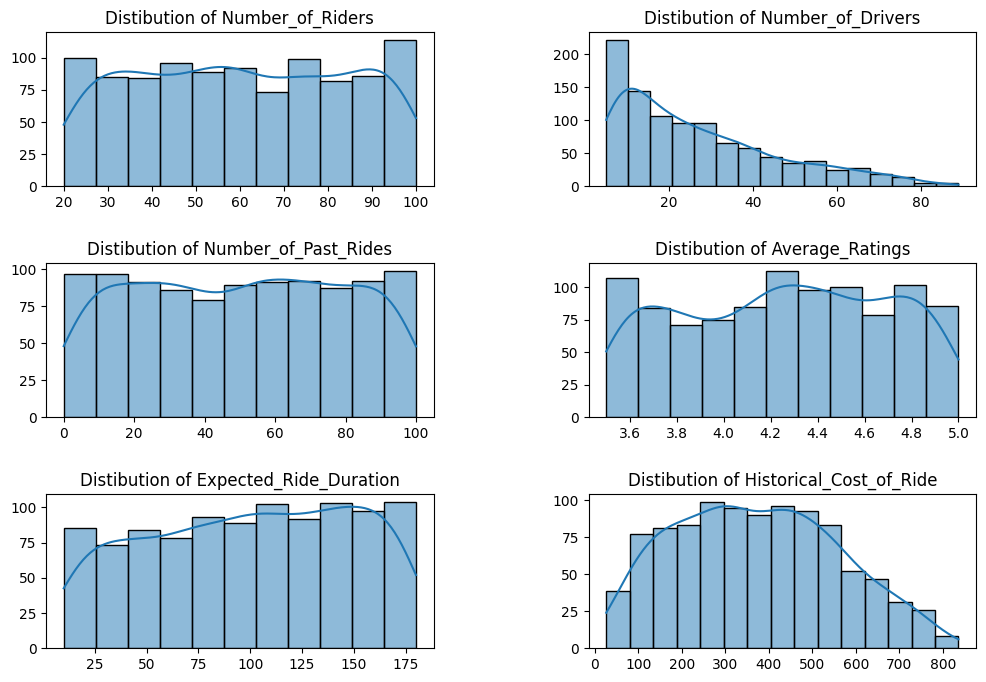

In [ ]:
# Performing Univariate Analysis
# Defining the numerical and categorical columns
numerical_cols = df.select_dtypes(include = 'number').columns
categorical_cols = df.select_dtypes(include = 'object').columns

# Plotting the distribution of the numerical features.
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows =3, ncols = 2, figsize = (12,8))
fig.subplots_adjust(hspace = 0.5, wspace = 0.4)

for i,col in enumerate(numerical_cols):
  sns.histplot(df[col], kde=True, ax= axes[i//2, i%2])
  axes[i//2, i%2].set_title(f'Distibution of {col}')
  axes[i//2, i%2].set_xlabel('')
  axes[i//2, i%2].set_ylabel('')

OBSERVATIONS FROM THE PLOTS: The distribution for the numerical features provide the following insights.

Number_of_Riders - The distribution is fairly uniform with values ranging from
                   20 to 100 riders. It suggests a wide variation of number of riders per ride.

Numbers_of_Drivers - It is skewed towards lower number, indicating that
                     there are fewer number of drivers available as compared to riders.

Number_of_Past_Riders - It is fairly even, though slightly skewed towards lower
                        values, indicate variability in customer experience with the service.

Average_Ratings - Mean rating is approximately 4.26, indicating positive
                  feedback from customers. The minimum rating is 3.5 and the maximum is 5.

Expected_Ride_Duration - Ride duration varies from 10 to 180 minutes, with                     average duration approximately of 99.59 minutes.

Historical_Cost_of_Ride - The cost varies from 26 to 836 units, with an average
                          of 372.50, skewed towards right, indicating most rides cost less than the mean.

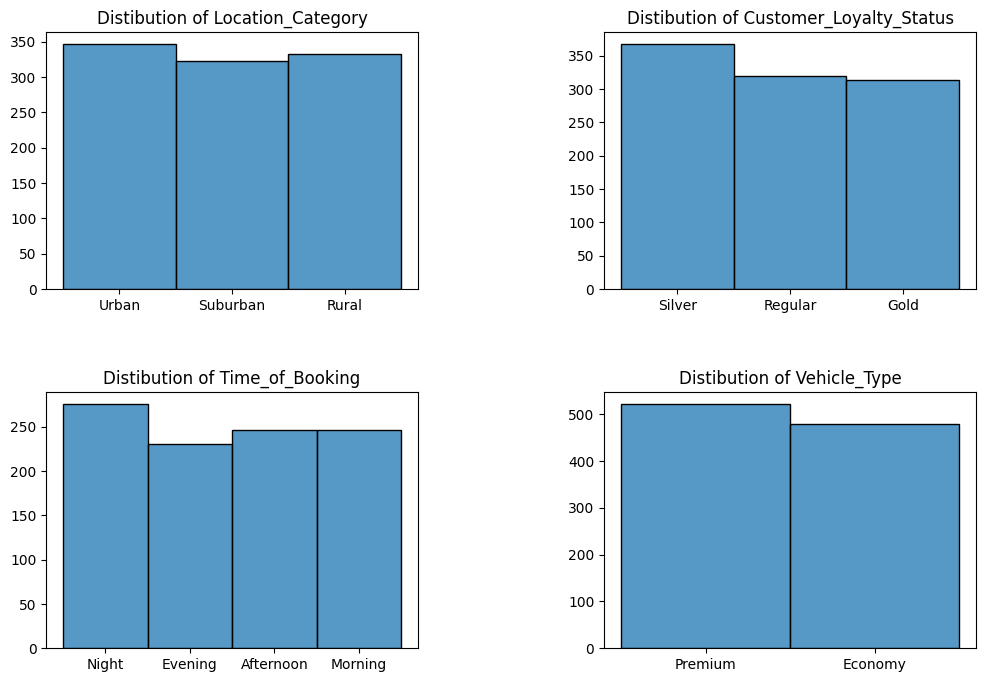

In [ ]:
# Plotting the distribution of categorical features
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

for i,col in enumerate(categorical_cols):
  sns.histplot(df[col], ax=axes[i//2, i%2])
  axes[i//2, i%2].set_title(f'Distibution of {col}')
  axes[i//2, i%2].set_xlabel('')
  axes[i//2, i%2].set_ylabel('')

OBSERVATIONS FROM THE PLOTS: The distribution for the categorical features provide following insights.

Location_category - It shows a variation with Urban likely the most common, followed by Rural and Suburban categories. It suggests that the location category could impact the cost of rides.

Customer_Loyalty_Status - It shows that silver has the higher loyalty status.

Time_of_Booking - Most of the bookings happens at night.

Vehicle_Type - There's a distribution across different vehicle types such as "Premium" and "Economy" out of which Premium Vehicles have more bookings.

BIVARIATE ANALYSIS:

After analyzing the distributions of numerical and categorical features, the next step is to perform Bivariate Analysis to explore the relationships between the target variable (Historical_Cost_of_Ride) and the other features. This analysis will help us identify which features have the most significant impact on ride cost, guiding our feature selection process for predictive modelling.

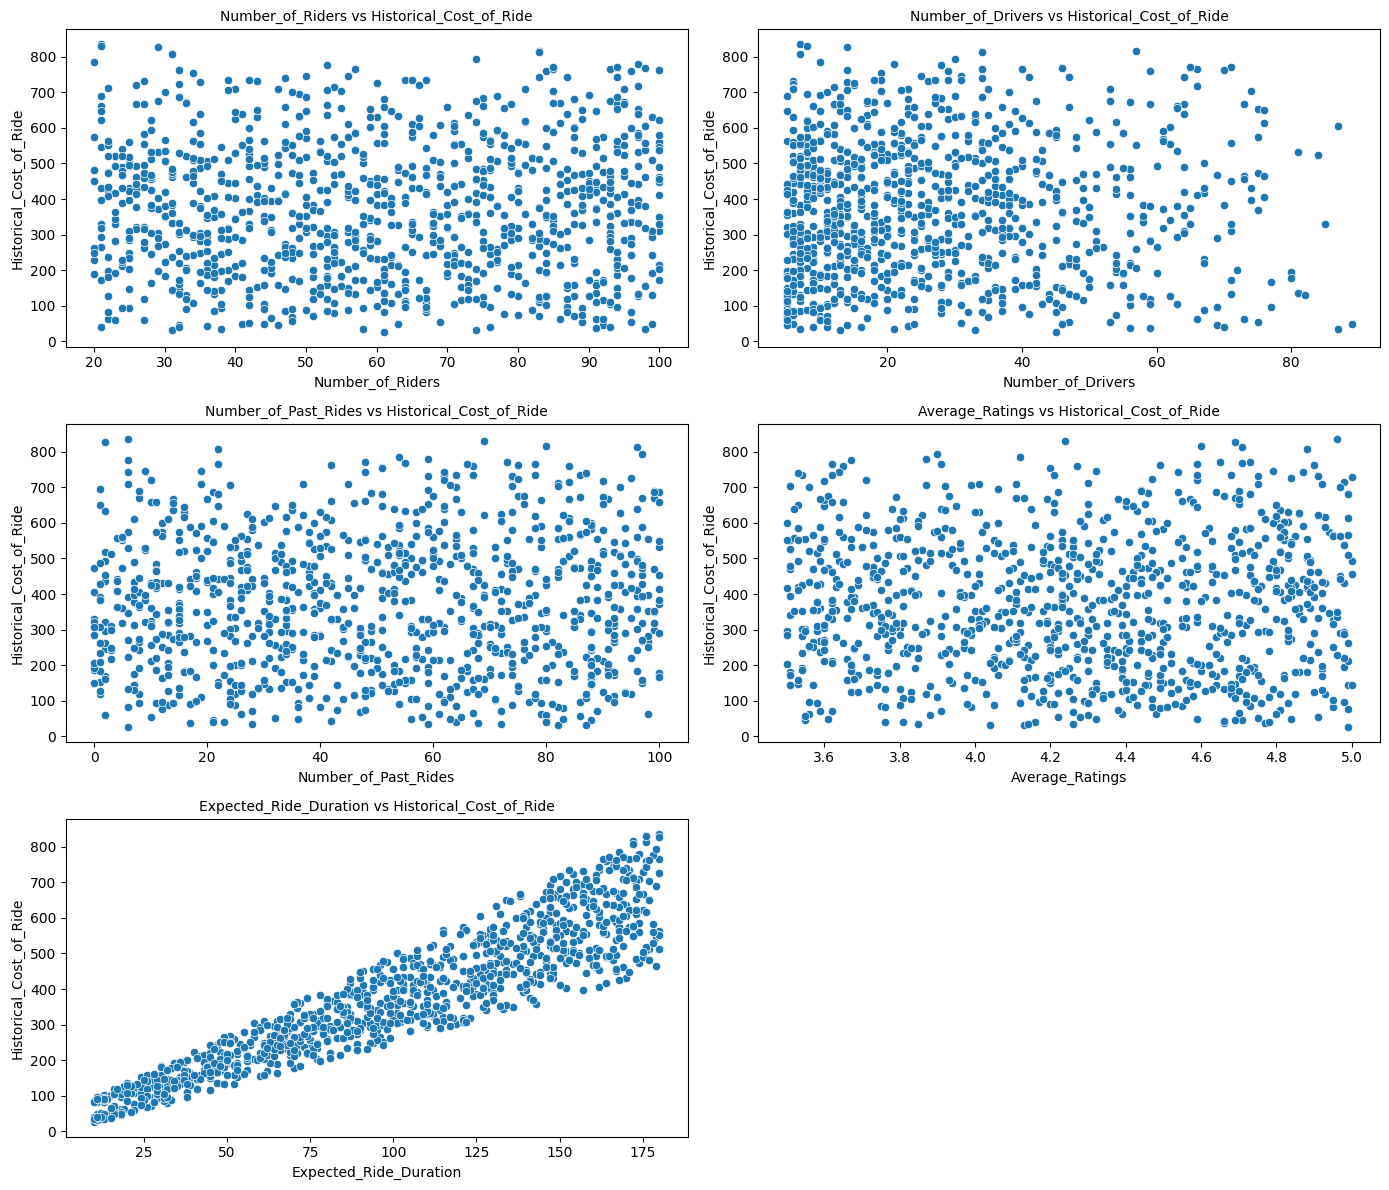

In [ ]:
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten()

# plot each numerical column against the historical cost.
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

OBSERVATIONS FROM THE PLOTS:

1. Number_of_Riders - There does not appear to be a clear linear relationship between the number of riders and the cost of the ride. The distribution of points is quite scattered, suggesting that while the number of riders may influence the cost, it is not a straight forward linear relationship.

2. Number_of_Drivers - Similar to the number of riders, the number of drivers available does not show a clear linear relationship with the ride cost. It indicates that while driver avialability might affect pricing dynamics, It does not do so in a simple direct manner.

3. Number_of_Past_Rides - There's no evident linear relationship between the number of past rides a customer has had and the cost of their rides, It suggest that customer loyalty, as measured by the number of past rides, does not directly influence the cost of rides linearly.

4. Average_Ratings - The scatter plot does not indicate a strong linear relationship between average ratings and rode cost. While we might have expected higher-rated drivers or customers to be associated with higher costs, the data does not support this.

5. Expected_Ride_Duration - There seems to be a more noticeable relationship here, with a potential trend indicating that longer expected ride duration are associated with higher costs. It is intutive, as longer rides would naturally cost more.

Given these observations, Expected_Ride_Duration stands out as a numerical feature with a more discernible relationship to the Historical_Cost_of_Ride. The other numerical features do not show clear linear relationships with the ride cost, but they might still contribute information in combination with other features or through non-linear relationships.

Now, let’s examine how the categorical features relate to the Historical_Cost_of_Ride using box plots to explore the variance in ride costs across different categories. It will help identify if certain categories are consistently associated with higher or lower ride costs:

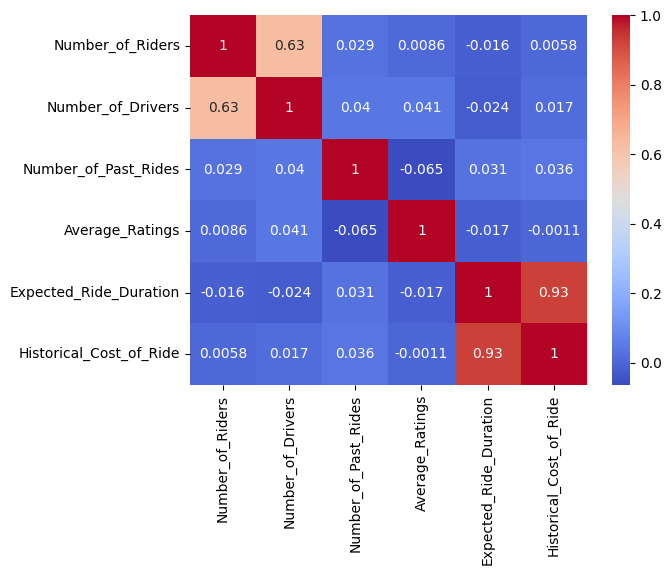

In [ ]:
# Check the correlation between numerical features

corr =df[['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings',
          'Expected_Ride_Duration', 'Historical_Cost_of_Ride']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

OBSERVATION FROM THE PLOT:

It is to be observed through the heatmap that Expected_Ride_Duration stands out as a numerical feature with a more descernible relationship to the Historical_Cost_of_Ride. The other numerical features do not show the clear linear relationship witht the ride cost, but they might still contribute information in combination with other features or through non linear relationships.

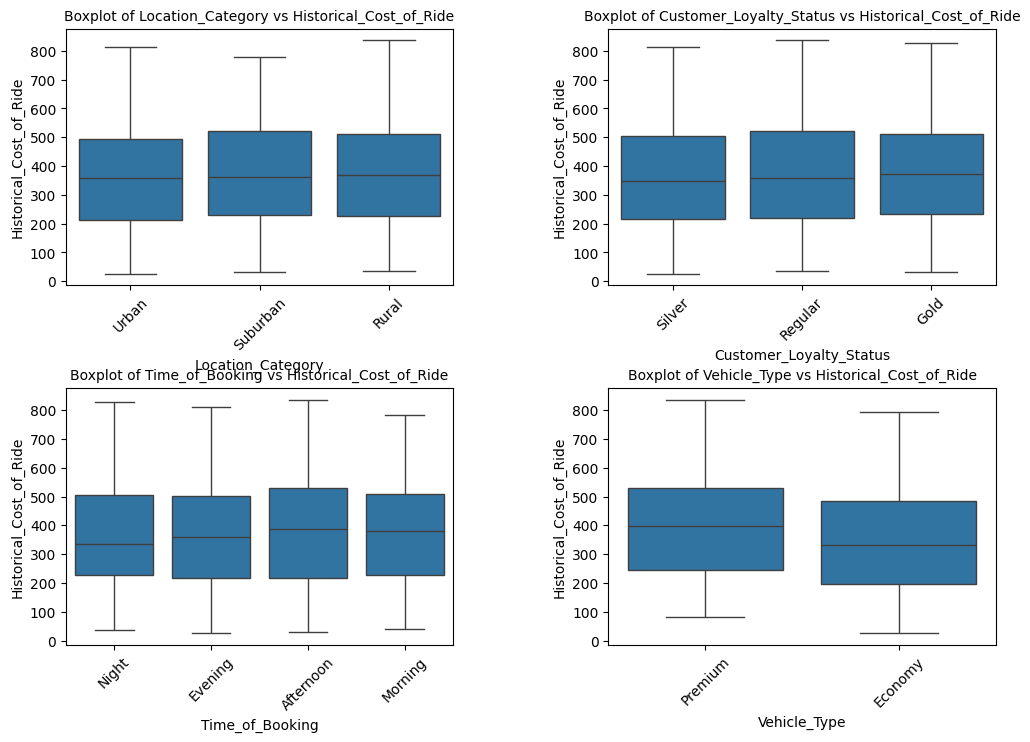

In [ ]:
# Bivariate Analysis: Categorical Features v/s Historical_Cost_of_Ride

fig, axes =plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,col in enumerate(categorical_cols):
  sns.boxplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
  axes[i//2, i%2].set_title(f'Boxplot of {col} vs Historical_Cost_of_Ride', fontsize=10)
  axes[i//2, i%2].set_xlabel(col)
  axes[i//2, i%2].set_ylabel('Historical_Cost_of_Ride')
  axes[i//2, i%2].tick_params(axis='x', rotation=45)

OBSERVATION FROM THE PLOTS:

The box plots reveal how the Historical_Cost_of_Ride varies across different categories for each categorical feature:


1. Location_Category: Ride costs vary significantly by location category, with “Urban” locations generally showing a wider range and potentially higher median costs compared to “Suburban” and “Rural” areas. It suggests that location plays a crucial role in determining ride costs, likely due to differences in demand, availability, and operational costs.
2. Customer_Loyalty_Status: There are noticeable differences in ride costs based on the loyalty status of the customer. While the median costs across different statuses seem relatively close, the variability in costs suggests that loyalty status could influence pricing, possibly through loyalty discounts or perks for higher-status customers.
3. Time_of_Booking: The time of booking appears to impact ride costs, with certain times of day showing different cost distributions. It could reflect demand variations throughout the day, with peak times potentially commanding higher prices.
4. Vehicle_Type: As expected, the type of vehicle has a significant impact on the cost of rides. “Premium” vehicles generally have higher costs compared to “Economy” vehicles, indicating that vehicle type is a critical factor in pricing.


Insights Gathered from EDA for Feature Selection
Based on the EDA, the following features are identified as potentially important for predicting ride costs:

1. Expected_Ride_Duration: Shows a clear relationship with ride cost.
2. Location_Category: Significant variance in costs by location.

3. Customer_Loyalty_Status: Variability in costs suggests an impact on pricing.

4.Time_of_Booking: Variations in costs indicate an influence of demand at different times.
5. Vehicle_Type: Directly influences cost with clear distinctions between vehicle types.

The other numerical features (Number_of_Riders, Number_of_Drivers, Number_of_Past_Rides, Average_Ratings) do not show strong linear relationships with the target variable but could still be useful, especially when combined with other features or through engineered features that capture non-linear relationships or interactions.